In [1]:
import pandas as pd
df=pd.read_csv('/content/fraud_detection_realistic.csv')
df

,TransactionID,Timestamp,TransactionAmount,CardType,Issuer,CardLimit,MerchantCountry,MerchantState,MerchantCity,UserAge,UserAccountTenure,UserIncome,AvgTransactionAmount,TransactionCountLastWeek,IsOnlineTransaction,IsHighRiskCountry,IsWeekendTransaction,TransactionHour,IsRepeatedTransaction,Class
0,1,79370,289.286276,Debit,BankC,6290.354552,UK,State2,CityA,32,17,72768.591712,154.075306,6,0,0,0,11,1,0
1,2,170518,3241.170438,Debit,BankA,19024.584405,US,State1,CityB,60,27,43070.157918,46.393384,1,1,0,0,23,1,0
2,3,100982,4566.851593,Credit,BankB,3968.258540,US,State3,CityB,41,8,42339.860428,97.925544,6,0,0,0,20,0,0
3,4,33049,2240.287256,Debit,BankA,8395.220499,UK,State3,CityC,29,4,37988.112260,32.940814,5,1,1,1,11,0,0
4,5,168766,4507.570636,Debit,BankC,3631.416099,DE,State3,CityB,39,9,85818.337303,68.298636,7,1,0,1,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,27573,538.076731,Credit,BankB,5191.583210,IN,State2,CityA,62,14,38461.723557,76.638659,8,1,1,1,9,0,0
996,997,65258,2403.082590,Debit,BankC,11462.084254,US,State1,CityB,43,19,80465.375733,116.299460,4,0,0,0,11,1,0
997,998,122608,1923.177444,Debit,BankC,13991.156202,US,State1,CityB,63,24,78233.285200,31.645761,8,1,0,1,6,0,0
998,999,130687,3007.722908,Credit,BankC,6967.074659,DE,State2,CityC,75,8,31362.384924,187.349688,2,0,1,1,15,1,0


In [7]:
df.columns

Index(['TransactionID', 'Timestamp', 'TransactionAmount', 'CardType', 'Issuer',
       'CardLimit', 'MerchantCountry', 'MerchantState', 'MerchantCity',
       'UserAge', 'UserAccountTenure', 'UserIncome', 'AvgTransactionAmount',
       'TransactionCountLastWeek', 'IsOnlineTransaction', 'IsHighRiskCountry',
       'IsWeekendTransaction', 'TransactionHour', 'IsRepeatedTransaction',
       'Class'],
      dtype='object')

In [16]:
df.dtypes

,0
TransactionID,int64
Timestamp,int64
TransactionAmount,float64
CardType,object
Issuer,object
CardLimit,float64
MerchantCountry,object
MerchantState,object
MerchantCity,object
UserAge,int64


In [10]:
df.shape

(1000, 20)

In [20]:
from sklearn.preprocessing import LabelEncoder
cat_features=["CardType","Issuer","MerchantCountry","MerchantState","MerchantCity",]
for col in cat_features:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])

In [21]:
X=df.iloc[:,1:-1]
X

,Timestamp,TransactionAmount,CardType,Issuer,CardLimit,MerchantCountry,MerchantState,MerchantCity,UserAge,UserAccountTenure,UserIncome,AvgTransactionAmount,TransactionCountLastWeek,IsOnlineTransaction,IsHighRiskCountry,IsWeekendTransaction,TransactionHour,IsRepeatedTransaction
0,79370,289.286276,1,2,6290.354552,3,1,0,32,17,72768.591712,154.075306,6,0,0,0,11,1
1,170518,3241.170438,1,0,19024.584405,4,0,1,60,27,43070.157918,46.393384,1,1,0,0,23,1
2,100982,4566.851593,0,1,3968.258540,4,2,1,41,8,42339.860428,97.925544,6,0,0,0,20,0
3,33049,2240.287256,1,0,8395.220499,3,2,2,29,4,37988.112260,32.940814,5,1,1,1,11,0
4,168766,4507.570636,1,2,3631.416099,0,2,1,39,9,85818.337303,68.298636,7,1,0,1,13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,27573,538.076731,0,1,5191.583210,2,1,0,62,14,38461.723557,76.638659,8,1,1,1,9,0
996,65258,2403.082590,1,2,11462.084254,4,0,1,43,19,80465.375733,116.299460,4,0,0,0,11,1
997,122608,1923.177444,1,2,13991.156202,4,0,1,63,24,78233.285200,31.645761,8,1,0,1,6,0
998,130687,3007.722908,0,2,6967.074659,0,1,2,75,8,31362.384924,187.349688,2,0,1,1,15,1


In [22]:
y=df.iloc[:,-1]
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit_transform(X_train)

array([[0.01631897, 0.38121711, 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.23576811, 0.81933688, 0.        , ..., 0.        , 0.04347826,
        1.        ],
       [0.36866108, 0.96794169, 0.        , ..., 1.        , 0.2173913 ,
        1.        ],
       ...,
       [0.2502106 , 0.06237007, 0.        , ..., 0.        , 0.2173913 ,
        1.        ],
       [0.10738333, 0.89663257, 1.        , ..., 1.        , 0.2173913 ,
        0.        ],
       [0.30891007, 0.69472016, 0.        , ..., 1.        , 0.30434783,
        0.        ]])

In [25]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=1)
X_train,y_train=smote.fit_resample(X_train,y_train)

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=1,n_estimators=100,max_depth=10,min_samples_split=5,min_samples_leaf=2,max_features="sqrt",class_weight="balanced")
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5, random_state=1)

In [44]:
import pickle
with open("rf_fraud_detect_model.pkl","wb") as f:
  pickle.dump(rf,f)

In [45]:
from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=2,eval_metrics='logloss',learning_rate=0.1,n_estimators=100,max_depth=6,subsample=0.8,colsample_bytree=0.8)
xgb.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:24:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "eval_metrics" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              eval_metrics='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [46]:
import pickle
with open("xgb_fraud_detect_model.pkl","wb") as f:
  pickle.dump(rf,f)

In [47]:
from sklearn.metrics import classification_report,confusion_matrix
print("Random Forest Performance:")
y_pred_rf=rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Random Forest Performance:
[[175  15]
 [  9   1]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       190
           1       0.06      0.10      0.08        10

    accuracy                           0.88       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.91      0.88      0.89       200



In [48]:
print("XGB Performance:")
y_pred_xgb=xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

XGB Performance:
[[175  15]
 [  9   1]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       190
           1       0.06      0.10      0.08        10

    accuracy                           0.88       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.91      0.88      0.89       200



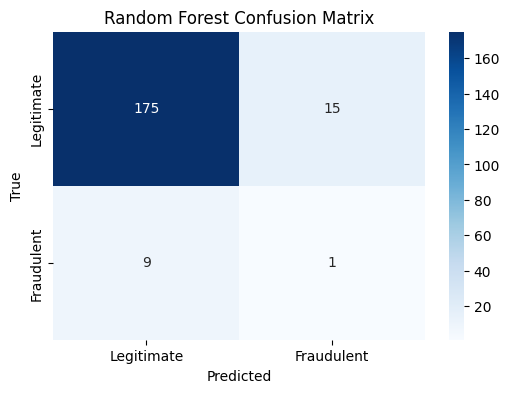

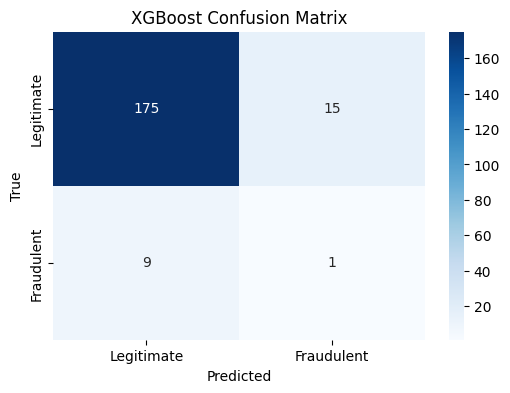

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, rf.predict(X_test))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Legitimate", "Fraudulent"], yticklabels=["Legitimate", "Fraudulent"])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, xgb.predict(X_test))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Legitimate", "Fraudulent"], yticklabels=["Legitimate", "Fraudulent"])
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [49]:
predict_new = [12045, 250.75, 15000, 35, 10, 75000, 200, 5, 1, 0, 1, 14, 0, 1, 0, 2, 1, 3]
predict_new_sclaed=scaler.transform([predict_new])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [52]:
with open("rf_fraud_detect_model.pkl", "rb") as f:
    rf_model = pickle.load(f)

In [56]:
rf_prediction=rf.predict(predict_new_sclaed)
rf_result="Fradulent" if rf_prediction[0]==1 else "Legitimate"
print("Random Forest Prediction:",rf_result)

Random Forest Prediction: Legitimate


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [54]:
with open("xgb_fraud_detect_model.pkl", "rb") as f:
    rf_model = pickle.load(f)

In [57]:
xgb_prediction = xgb.predict(predict_new_sclaed)
xgb_result = "Fraudulent" if xgb_prediction[0] == 1 else "Legitimate"
print("XGBoost Prediction:", xgb_result)

XGBoost Prediction: Legitimate


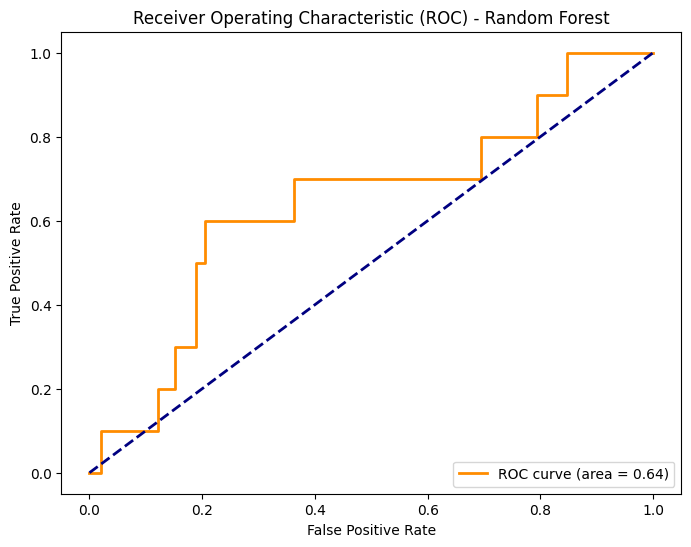

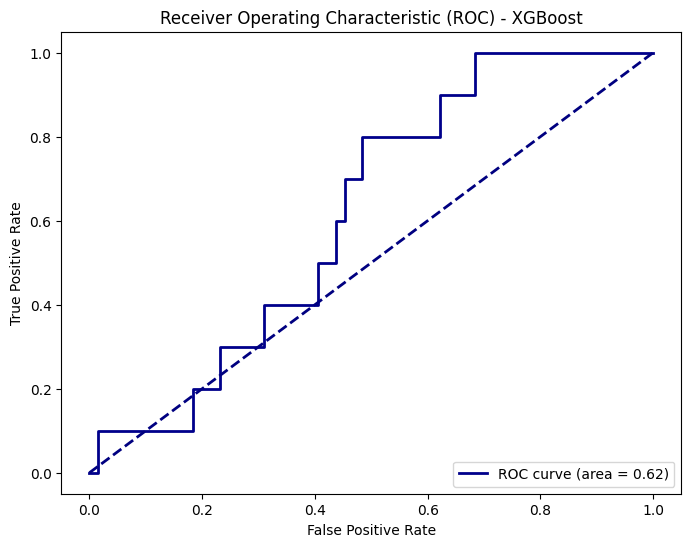

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) - Random Forest")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Calculate ROC curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
roc_auc_xgb = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

# Plot ROC curve for XGBoost
plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkblue', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("Receiver Operating Characteristic (ROC) - XGBoost")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
